# Data Cleaning

## Imports

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10, 5] #default figure size

In [5]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Extraction was done by Barry Becker from the 1994 Census database.
# Prediction task is to determine whether a person makes over 50K a year.

# summary of algorithms run with error rates after unknown removal
# Conversion of original data as follows:
# 1. Discretized agrossincome into two ranges with threshold 50
# 2. Convert U.S. to US to avoid periods.
# 3. Convert Unknown to "?"
# 4. Run MLC++ GenCVFiles to generate data test.

# Description of fnlwgt (final weight)
# The weights on the CPS files are controlled to independent estimates of the
# civilian noninstitutional population of the US.
# Assumption: People with similar demographic characteristics should have similar # weights.  

In [7]:
# read the train data
header=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target']
df = pd.read_csv('data/adult.data.csv',names=header)

In [8]:
# test data is provided separately
# read the test data
test_df = pd.read_csv('data/adult.test.csv',names=header)
# drop the first row
test_df = test_df.iloc[1:]

In [9]:
test_df['age'] = test_df['age'].astype(float)

In [10]:
# combine the train and test data
df = pd.concat([df,test_df])

In [11]:
# train
df.shape

(48842, 15)

In [12]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   marital-status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  48842 non-null  object 
 14  target          48842 non-null  object 
dtypes: float64(6), object(9)
memory usage: 6.0+ MB


In [14]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
# since fnlwgt is an estimate by gov
# we suspect the accruacy of it
# so we drop it
df.drop(columns=['fnlwgt'], inplace=True)

In [16]:
# since education is highly correlated with education-num
# we decide to drop it
df.drop(columns=['education'], inplace=True)

In [17]:
# replace missing data (comes with " ?") with NaN
df.replace(" ?", np.nan, inplace = True)
df.isnull().sum()

age                  0
workclass         2799
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
target               0
dtype: int64

In [18]:
# impute missing values with mode
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()
# now we have no missing values

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [19]:
# create capital_change to summarize capital_loss & capital_gain
df['capital_change'] = df['capital-gain']-df['capital-loss']
for i in ['capital-loss','capital-gain']:
    df.drop(columns=[i], inplace=True)

In [20]:
df.target.value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: target, dtype: int64

In [21]:
# encode target feature
df['target'] = df['target'].map({' <=50K': 0, ' >50K': 1,' <=50K.': 0, ' >50K.': 1})

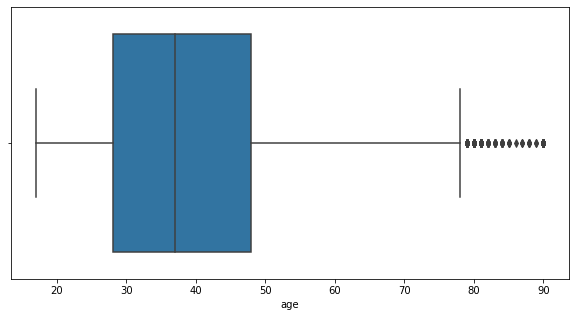

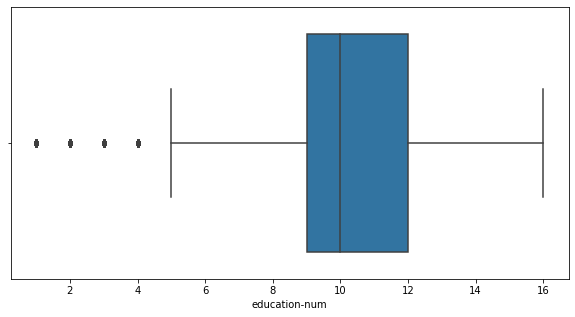

In [22]:
# outliers
features = ['age','education-num']
for i in features:
    sns.boxplot(df[i])
    plt.show()

EDA

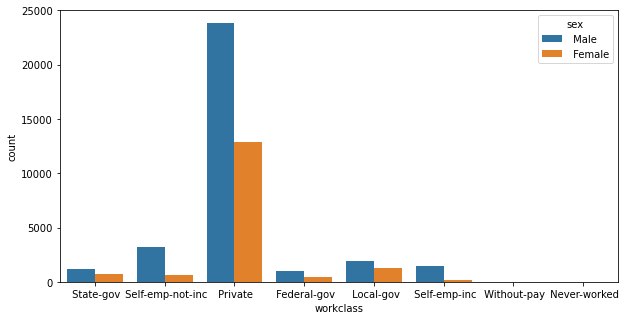

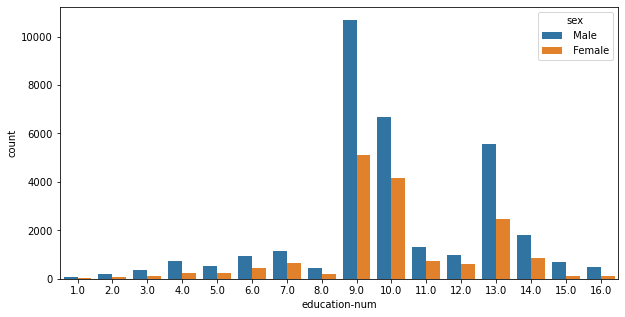

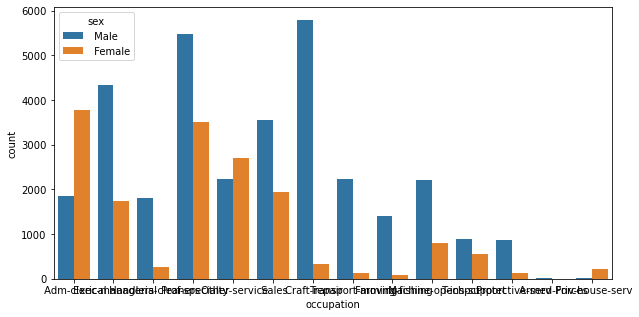

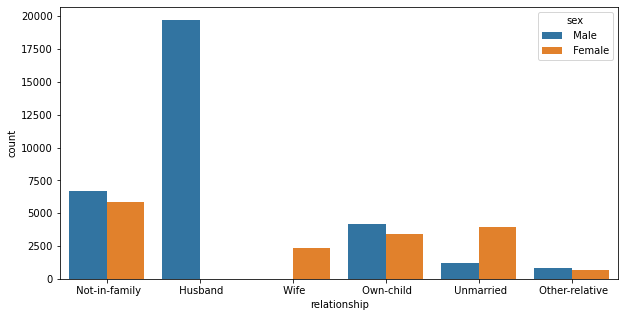

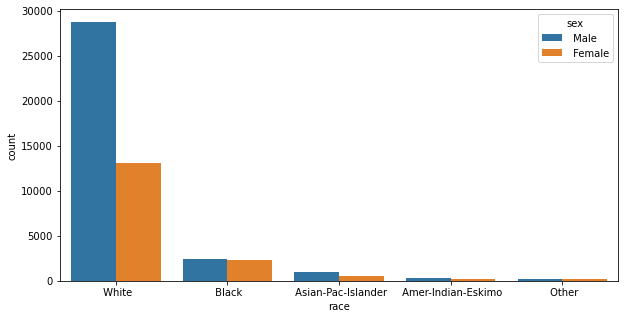

In [23]:
s = ['workclass','education-num','occupation','relationship','race']
for i in s:
    sns.countplot(data = df, x = i , hue ='sex')
    plt.show()
# workclass - private (male)
# education - HS-grad -> Some-collage -> Bachelors
# Occupation - male -> Craft-repair , female -> Adm-clerical , mixed -> Prof-specialty
# race - White(mainly) -> Black
# Country - USA (mainly)

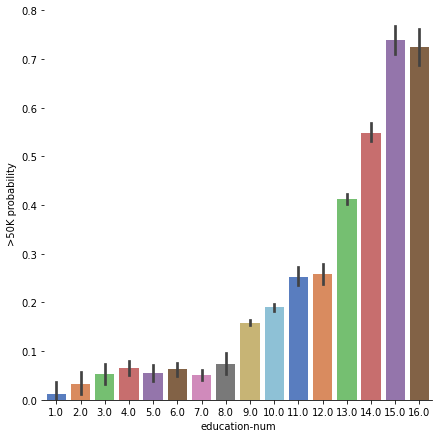

In [24]:
# Explore education_num vs Income
g = sns.factorplot(x="education-num",y="target",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

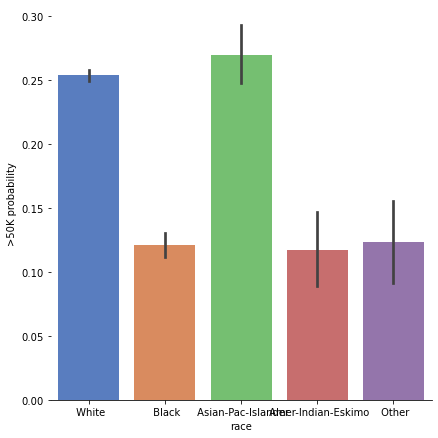

In [25]:
# Explore race vs Income
g = sns.factorplot(x="race",y="target",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

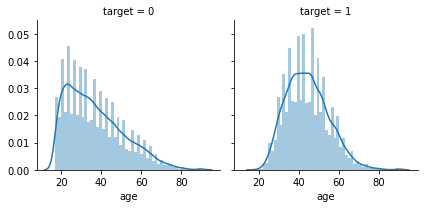

In [26]:
# Explore Age vs income
g = sns.FacetGrid(df, col='target')
g = g.map(sns.distplot, "age")
plt.show()

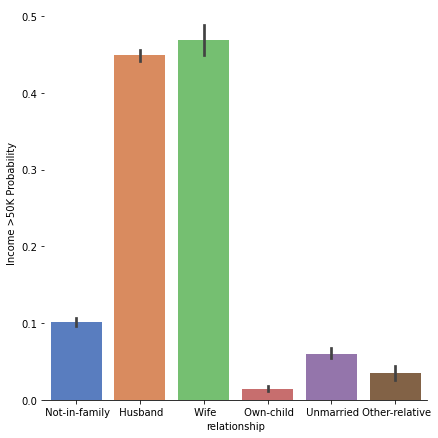

In [27]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="target",data=df,kind="bar", size = 6 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

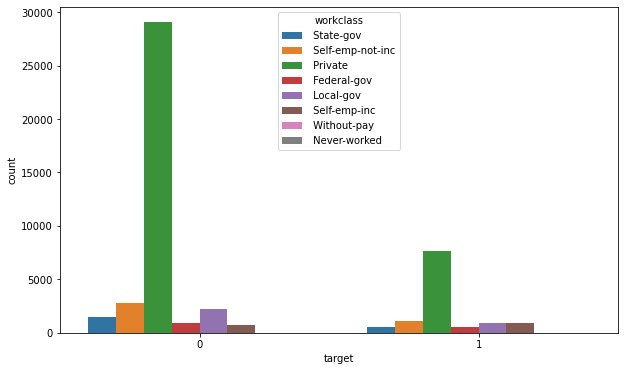

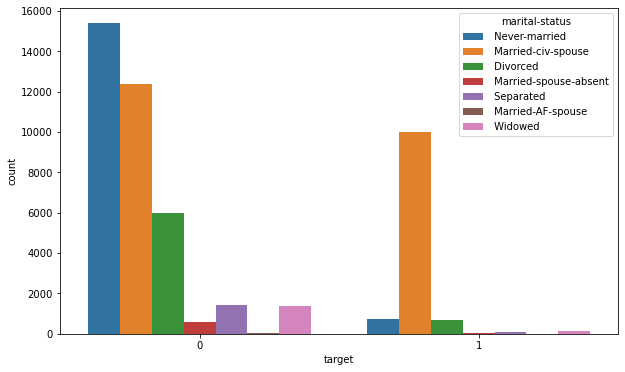

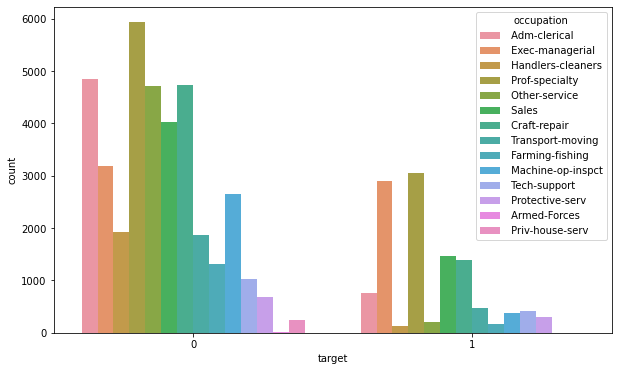

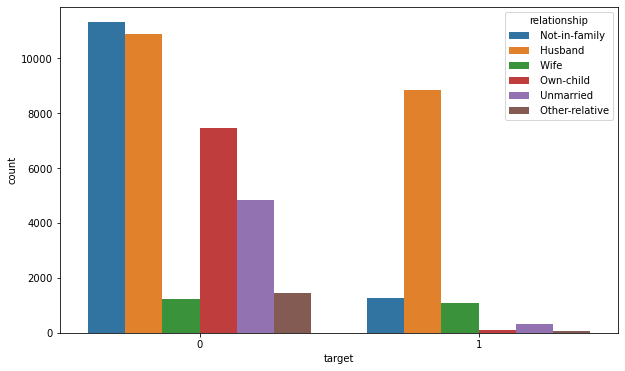

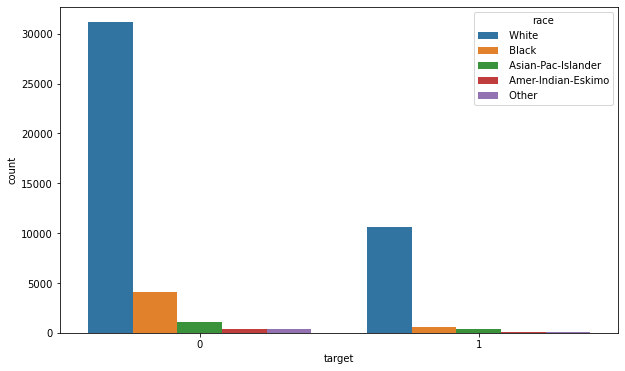

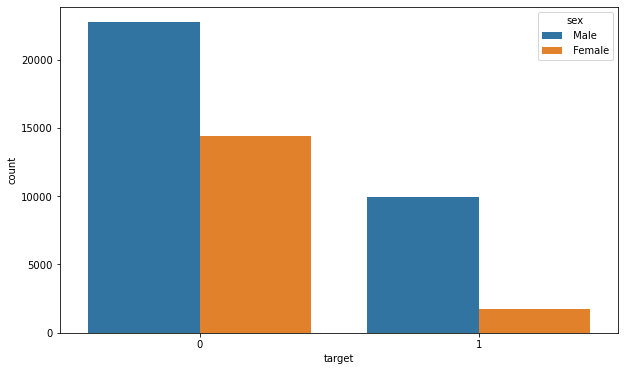

In [28]:
for col in df[['workclass','marital-status','occupation','relationship','race','sex']]:
    fig, axes = plt.subplots(figsize = (10,6))
    sns.countplot(data = df, x = "target", hue = col)
    plt.show()

In [29]:
df['native-country'].value_counts()
# native-country is mainly United-States

 United-States                 44689
 Mexico                          951
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Nicaragua                        49
 Greece                           49
 Peru                             46
 

In [30]:
# encode for categorical features
df = pd.get_dummies(df,drop_first=True)

In [31]:
df.head()

,age,education-num,hours-per-week,target,capital_change,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39.0,13.0,40.0,0,2174.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,13.0,13.0,0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38.0,9.0,40.0,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53.0,7.0,40.0,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28.0,13.0,40.0,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16281
Data columns (total 81 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         48842 non-null  float64
 1   education-num                               48842 non-null  float64
 2   hours-per-week                              48842 non-null  float64
 3   target                                      48842 non-null  int64  
 4   capital_change                              48842 non-null  float64
 5   workclass_ Local-gov                        48842 non-null  uint8  
 6   workclass_ Never-worked                     48842 non-null  uint8  
 7   workclass_ Private                          48842 non-null  uint8  
 8   workclass_ Self-emp-inc                     48842 non-null  uint8  
 9   workclass_ Self-emp-not-inc                 48842 non-null  uint8  
 10  workclass_

In [33]:
# target and features setting
X = df.drop(['target'],axis=1)
y = df['target']

In [34]:
X

,age,education-num,hours-per-week,capital_change,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39.0,13.0,40.0,2174.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50.0,13.0,13.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,9.0,40.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53.0,7.0,40.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28.0,13.0,40.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39.0,13.0,36.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16278,64.0,9.0,40.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16279,38.0,13.0,50.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16280,44.0,13.0,40.0,5455.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
df['target']

0        0
1        0
2        0
3        0
4        0
        ..
16277    0
16278    0
16279    0
16280    0
16281    1
Name: target, Length: 48842, dtype: int64

In [36]:
y

0        0
1        0
2        0
3        0
4        0
        ..
16277    0
16278    0
16279    0
16280    0
16281    1
Name: target, Length: 48842, dtype: int64

In [37]:
# splitting data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Modelling

In [38]:
# transformation and scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39073, 80)
(39073,)
(9769, 80)
(9769,)


# LogisticRegression

In [44]:
# Baseline model
from sklearn import metrics
from sklearn.metrics import classification_report

In [56]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance of LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

print("Logistic Regression Accuracy: {0:.1%}".format(logmodel.score(X_test, y_test)))

Logistic Regression Accuracy: 84.2%


In [42]:
y_pred = logmodel.predict(X_test)

In [48]:
print('Logistic Regression F1 Scores')
print(classification_report(y_test,y_pred, digits=3))

Logistic Regression F1 Scores
              precision    recall  f1-score   support

           0      0.875     0.923     0.898      7383
           1      0.713     0.593     0.647      2386

    accuracy                          0.842      9769
   macro avg      0.794     0.758     0.773      9769
weighted avg      0.835     0.842     0.837      9769



# Linear Support Vector Classification

In [49]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
lsvc = LinearSVC()

parameters = {'penalty':('l1', 'l2'),'loss':('hinge', 'squared_hinge'),'C':[1,10]}
clf = GridSearchCV(lsvc, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [1, 10], 'loss': ('hinge', 'squared_hinge'),
                         'penalty': ('l1', 'l2')})

In [50]:
y_pred = clf.predict(X_test)

In [57]:
#clf.score(X_test, y_test)
print("Linear SVC Accuracy: {0:.1%}".format(clf.score(X_test, y_test)))

Linear SVC Accuracy: 84.3%


In [52]:
print('Linear SVC F1 Scores')
print(classification_report(y_test,y_pred,digits=3))

Linear SVC F1 Scores
              precision    recall  f1-score   support

           0      0.875     0.924     0.899      7383
           1      0.716     0.590     0.647      2386

    accuracy                          0.843      9769
   macro avg      0.795     0.757     0.773      9769
weighted avg      0.836     0.843     0.837      9769



# K-Neighbors Classifier

In [53]:
## import the knn model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
## try running from k=1 through 25 and record the accuaracy 
#k_range = range(1,26) ## setting k from 1-25
# score={} ## record the accuracy
# score_list=[]
knn = KNeighborsClassifier(n_neighbors=14, weights = 'uniform' ) ## k=3
knn.fit(X_train, y_train) ## learn from training dataset
y_pred=knn.predict(X_test)
score = metrics.accuracy_score(y_test,y_pred)
#score_list.append(metrics.accuracy_scorec(y_test,y_pred))
    

In [58]:
#score
print("KNN Classifier Accuracy: {0:.1%}".format(score))

KNN Classifier Accuracy: 83.5%


In [59]:
from sklearn.metrics import classification_report

In [60]:
print('KNN Classifier F1 Scores')
print(classification_report(y_test,y_pred, digits=3))

KNN Classifier F1 Scores
              precision    recall  f1-score   support

           0      0.863     0.929     0.895      7383
           1      0.712     0.545     0.617      2386

    accuracy                          0.835      9769
   macro avg      0.788     0.737     0.756      9769
weighted avg      0.826     0.835     0.827      9769



# Random Forests Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=70, max_leaf_nodes=1000, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

#accuracy_score(y_test, y_pred_rf)
print("Random Forests Classifier Accuracy: {0:.1%}".format(accuracy_score(y_test, y_pred_rf)))

Random Forests Classifier Accuracy: 86.1%


In [62]:
print('Random Forests Classifier F1 Scores')
print(classification_report(y_test,y_pred_rf, digits=3))

Random Forests Classifier F1 Scores
              precision    recall  f1-score   support

           0      0.878     0.948     0.911      7383
           1      0.786     0.591     0.674      2386

    accuracy                          0.861      9769
   macro avg      0.832     0.769     0.793      9769
weighted avg      0.855     0.861     0.854      9769



# AdaBoost

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=1000,learning_rate=0.05, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.05, n_estimators=1000, random_state=42)

In [64]:
y_pred = ada_clf.predict(X_test)
#accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy: {0:.1%}".format(accuracy_score(y_test, y_pred_rf)))

AdaBoost Accuracy: 86.1%


In [65]:
print('AdaBoost F1 Scores')
print(classification_report(y_test,y_pred, digits=3))

AdaBoost F1 Scores
              precision    recall  f1-score   support

           0      0.892     0.943     0.916      7383
           1      0.785     0.645     0.708      2386

    accuracy                          0.870      9769
   macro avg      0.838     0.794     0.812      9769
weighted avg      0.865     0.870     0.866      9769



In [ ]:
#END